In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [2]:
advanced_passing = pd.read_csv('../data/advpass.csv')

advanced_passing = advanced_passing[['Player', 'Bad%', 'Att']]

In [3]:
basic_passing = pd.read_csv('../data/basicpass.csv')

basic_passing = basic_passing[['Player', 'IAY/PA']]

In [4]:
# Merge the dataframes on Player
df = pd.merge(advanced_passing, basic_passing, on='Player', how='inner')

In [5]:
# Keep only alphanumeric characters in Player column and spaces
df['Player'] = df['Player'].replace('[^a-zA-Z0-9\s]', '', regex=True)

In [6]:
# Keep only Players with > 150 attempts
df = df[df['Att'] > 200]

In [7]:
df

,Player,Bad%,Att,IAY/PA
0,Patrick Mahomes,15.40%,648,7.2
1,Justin Herbert,12.90%,699,6.4
2,Tom Brady,16.40%,733,6.7
3,Kirk Cousins,15.20%,643,7.5
4,Joe Burrow,12.90%,606,6.8
5,Jared Goff,16.80%,587,7.0
6,Josh Allen,16.60%,567,9.2
7,Geno Smith,11.80%,572,7.6
8,Trevor Lawrence,15.00%,584,7.4
9,Jalen Hurts,14.20%,460,8.1


In [8]:
teams = nfl.import_team_desc()

In [9]:
player_teams = {
    "Patrick Mahomes": "KC",
    "Justin Herbert": "LAC",
    "Tom Brady": "TB",
    "Kirk Cousins": "MIN",
    "Joe Burrow": "CIN",
    "Jared Goff": "DET",
    "Josh Allen": "BUF",
    "Geno Smith": "SEA",
    "Trevor Lawrence": "JAX",
    "Jalen Hurts": "PHI",
    "Aaron Rodgers": "GB",
    "Tua Tagovailoa": "MIA",
    "Russell Wilson": "DEN",
    "Derek Carr": "LV",
    "Daniel Jones": "NYG",
    "Davis Mills": "HOU",
    "Matt Ryan": "IND",
    "Mac Jones": "NE",
    "Andy Dalton": "NO",
    "Dak Prescott": "DAL",
    "Jacoby Brissett": "MIA",
    "Ryan Tannehill": "TEN",
    "Jimmy Garoppolo": "SF",
    "Kenny Pickett": "PIT",
    "Kyler Murray": "ARI",
    "Justin Fields": "CHI",
    "Lamar Jackson": "BAL",
    "Marcus Mariota": "ATL",
    "Baker Mayfield": "LA",
    "Matthew Stafford": "LA",
    "Taylor Heinicke": "WAS",
    "Carson Wentz": "WAS",
    "Zach Wilson": "NYJ",
    "Brock Purdy": "SF",
    "Mitchell Trubisky": "PIT",
    "Mike White": "NYJ",
    "Deshaun Watson": "CLE",
    "Joe Flacco": "NYJ",
    "Cooper Rush": "DAL",
}

df['team_abbr'] = df['Player'].map(player_teams)

In [10]:
# Merge onto teams 
df = df.merge(teams, on='team_abbr', how='left')

In [11]:
df = df.dropna(subset=['Bad%'])
df['Bad%'] = df['Bad%'].astype(str).str.replace('%', '').astype(float)

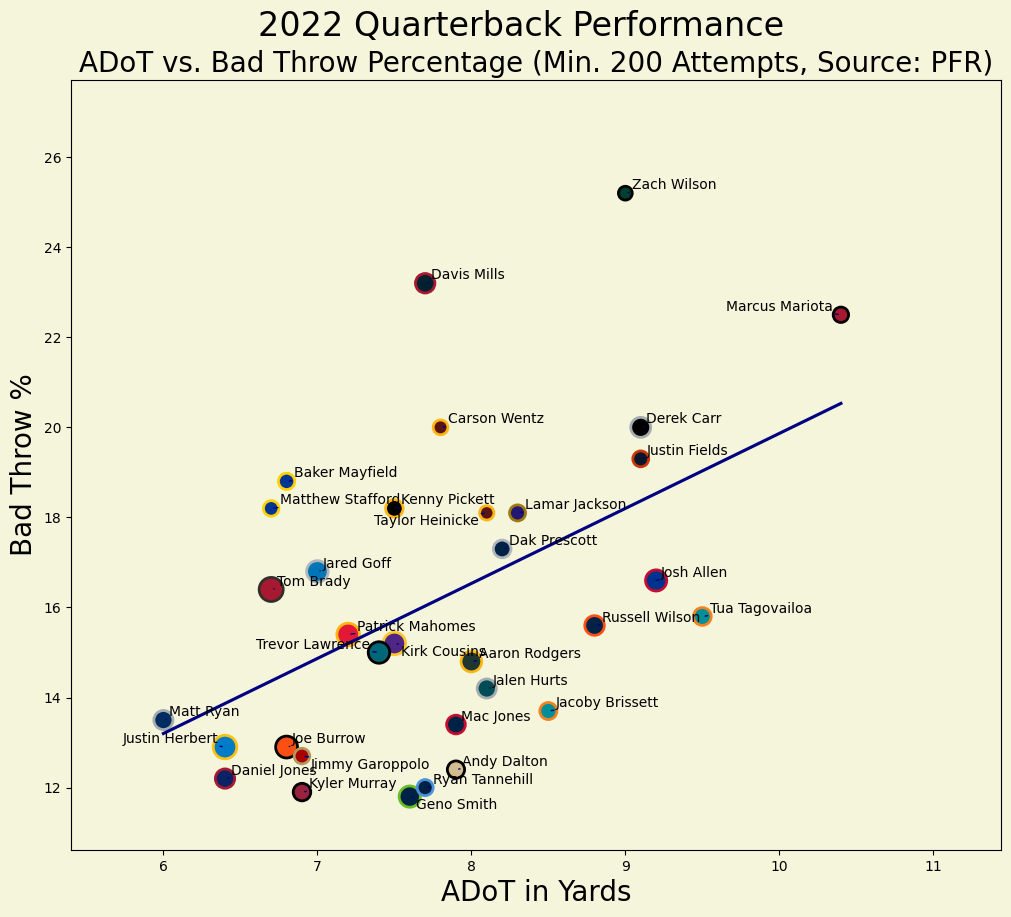

In [41]:
from adjustText import adjust_text
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = df['Att'] / max(df['Att']) * 300
scatter = ax.scatter(df['IAY/PA'], df['Bad%'], c=df['team_color'],
                     s=point_size, edgecolor=df['team_color2'], linewidth=2)

sns.regplot(x='IAY/PA', y='Bad%', data=df,
            scatter=False, ax=ax, color='navy', ci=None)

texts = []
for x0, y0, player in zip(df['IAY/PA'], df['Bad%'], df['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=10))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (1.2, 1.2),
    'expand_text': (1, 1),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2022 Quarterback Performance", fontsize=24, y=0.95, ha='center')
plt.title("ADoT vs. Bad Throw Percentage (Min. 200 Attempts, Source: PFR)",
          fontsize=20, y=1.0, ha='center')
plt.xlabel('ADoT in Yards', fontsize=20)
plt.ylabel('Bad Throw %', fontsize=20)

# make the axes limits +10% of the max value
x_max = df['IAY/PA'].max()
y_max = df['Bad%'].max()

# make the axes minimums -10% of the max value
x_min = df['IAY/PA'].min()
y_min = df['Bad%'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Save the plot as a high-quality image
plt.savefig('../images/advanced_passing.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()